In [1]:
#importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [2]:
#importing dataset
df=pd.read_csv(r"C:\Users\HP\Downloads\browser_rankings_data.csv")

In [3]:
#first let us check whether the dataset is printed correctly
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [4]:
#our dataset is correctly printed

In [5]:
#let us find out how many rows and columns in the datset
df.shape

(3066, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [7]:
#so we found that our dataset do not have any null values

# Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?

In [8]:
df.columns

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

<AxesSubplot:>

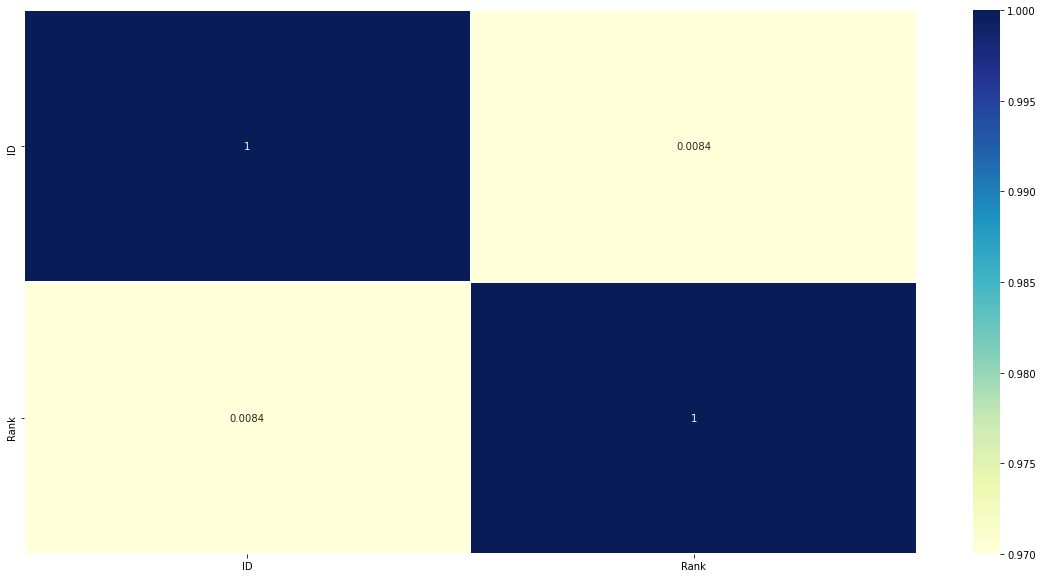

In [9]:
corrmatrix =df.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=.97,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

# we have sucessfully ploted corelation matrix but find out that we need to perform chisquare teat because they are all categorical varibles

# first let us find out correlation b/w Short Description and long Description and set p value as .05
# Here null hypothesis: there is no correlation between Short Description and long Description
# Alternative Hypothesis: there is correlation between the features 

In [10]:
ct = pd.crosstab(df['Short Description'], df['Long Description'])
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')

chisquare value:24527.999999999996
p value:0.0


so both features are Highly co related

now let us check whethere ranking is colelated or not

In [11]:
ct = pd.crosstab(df['Short Description'], df['Rank'])
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')

chisquare value:6067.446466498302
p value:0.0


# so there are co-relation between short description, long description and ranking

In [12]:
#Now let us check whether keyword has corelation with ranking
#set p value as .05
#Here null hypothesis: there is no correlation between keyword and Rank
#Alternative Hypothesis: there is correlation between the features

In [13]:
ct = pd.crosstab(df['Keyword'], df['Rank'])
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')

chisquare value:3290.616855972886
p value:0.0


therefore keyword and ranking are highly corelated

# Does APP ID (Also known as package name) play any role in ranking? 

In [16]:
pd.crosstab(df['App ID'], df['Rank'])

Rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,134.0
App ID,,,,,,,,,,,,,,,,,,,,,
com.android.chrome,18,6,7,6,1,5,4,11,1,8,...,0,0,0,0,0,0,0,0,0,0
com.brave.browser,5,201,57,39,20,23,9,10,2,2,...,0,0,0,0,0,0,0,0,0,0
com.cloudmosa.puffinTV,72,212,80,76,32,36,40,8,16,12,...,0,0,0,0,0,0,0,0,0,0
com.duckduckgo.mobile.android,428,12,0,0,12,104,24,10,2,0,...,0,0,0,0,0,0,0,0,0,0
com.opera.browser,8,38,62,44,50,34,26,16,12,10,...,0,0,0,0,0,0,0,0,0,0
com.transsion.phoenix,0,0,0,0,0,6,11,15,15,20,...,1,0,1,0,0,0,1,0,1,0
com.vivaldi.browser,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,2,2,1,2,0,1
net.fast.web.browser,31,21,8,5,10,5,8,12,8,8,...,0,0,0,0,0,0,0,0,0,0


we find out that there are only 8 app ids

In [18]:
df["Rank"].nunique()

119

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Rank Wise Count \n')

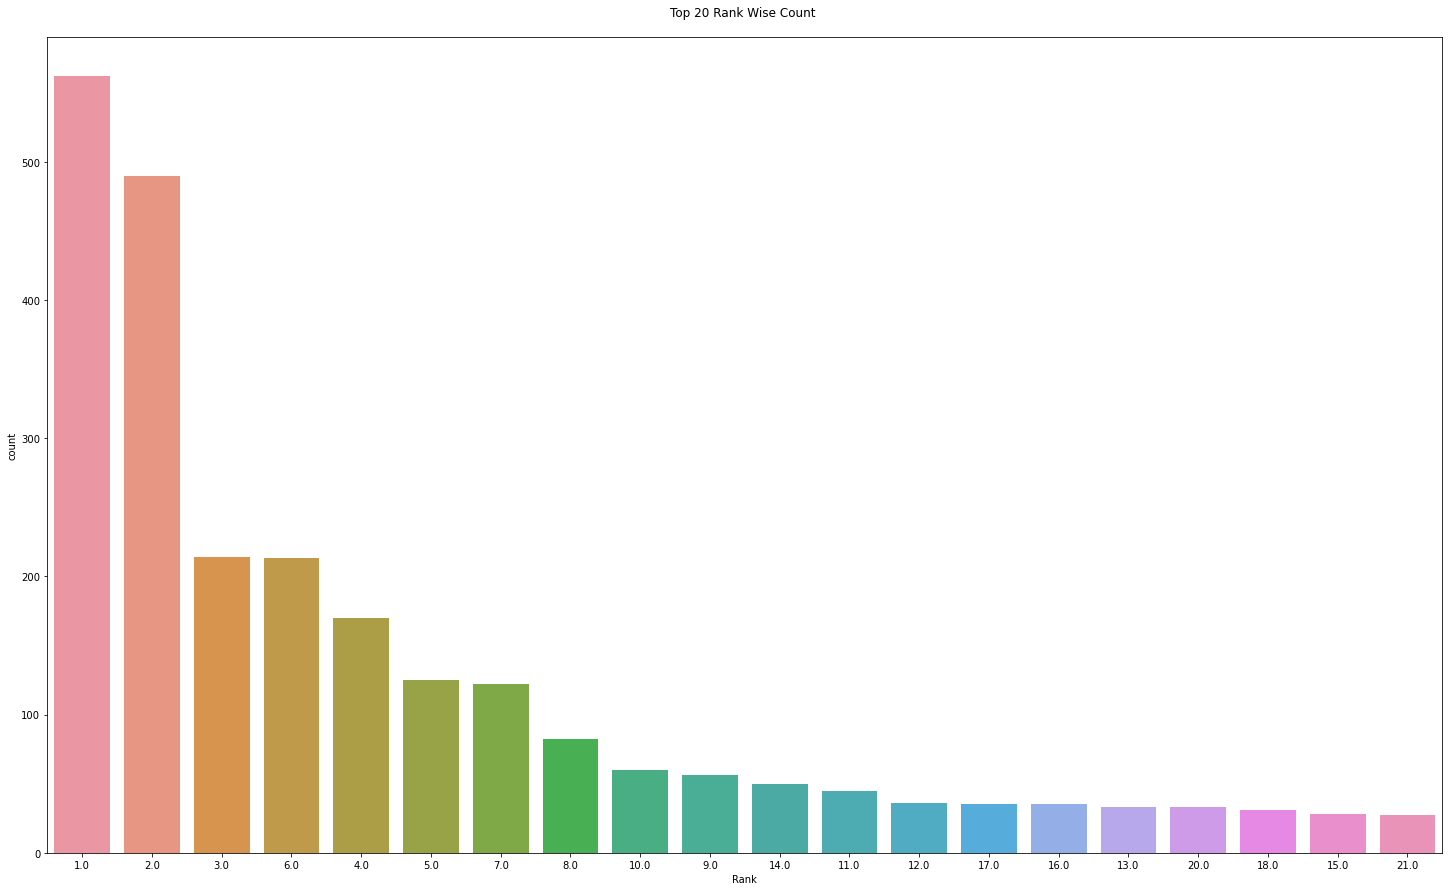

In [19]:
ItemCount = df["Rank"].value_counts().nlargest(20)
plt.figure(figsize=(25,15))
sns.countplot(df['Rank'],order = df['Rank'].value_counts().nlargest(20).index)
plt.title('Top 20 Rank Wise Count \n')

In [20]:
ct = pd.crosstab(df['App ID'], df['Rank'])
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')

chisquare value:6067.446466498302
p value:0.0


# so APP ID and Rank are co related

# Any other pattern or good questions that you can think of and answer?

# do ID column and rank co related

# no from co relation matrix it is clear that ID and rank are not co related

# but ID has no Feature Importance so we can drop id

In [22]:
df=df.drop(['ID'],axis=1)